In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [ ]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
all_mae_histories = []

In [ ]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kf.split(x_train):
    partial_x_train, val_x = x_train[train_index], x_train[val_index]
    partial_y_train, val_y = y_train[train_index], y_train[val_index]

    model = build_model()
    history = model.fit(
        partial_x_train, partial_y_train,
        validation_data=(val_x, val_y),
        epochs=num_epochs,
        batch_size=16,
        verbose=0
    )

    val_mae = history.history["val_mae"]
    all_mae_histories.append(val_mae)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

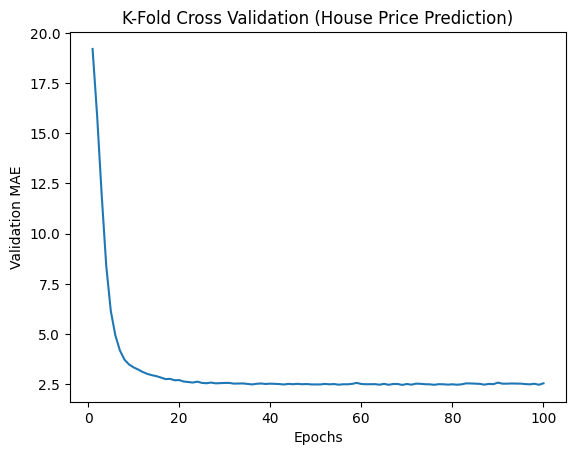

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("K-Fold Cross Validation (House Price Prediction)")
plt.show()

In [ ]:
final_model = build_model()
final_model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = final_model.evaluate(x_test, y_test)
print("Final Test MAE:", test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.5142 - mae: 2.3918
Final Test MAE: 2.612149715423584


In [ ]:
sample = x_test[0].reshape(1, -1)

In [ ]:
predicted_price = final_model.predict(sample)

print("Predicted Price (in $1000s):", predicted_price[0][0])
print("Actual Price (in $1000s):", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Price (in $1000s): 7.749584
Actual Price (in $1000s): 7.2
